In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# 读取数据
file_path = 'data_q1.csv'  # 请替换成你的数据文件路径
df = pd.read_csv(file_path)

# 仅保留前40行
df = df.head(40)

# 分割输入特征和输出列
X = df.iloc[:, [1, 2, 3, 4, 5, 6]]  # 第1到第6列作为输入特征
y = df.iloc[:, 10] * 100  # 将第11列的所有值都乘以100，变成百分数

# # 将最后两行作为开发数据
dev_data = df.tail(2)
dev_X = dev_data.iloc[:, [1, 2, 3, 4, 5, 6]]
dev_y = dev_data.iloc[:, 10] * 100

# 检查数据类型
print(X.dtypes)

# 读取另一个CSV文件作为开发数据
file_path_dev = 'q4_cleaned.csv'  # 请替换成你的另一个CSV文件路径
df_dev = pd.read_csv(file_path_dev)

# 使用所有行作为开发数据
dev_X2 = df_dev.iloc[:, [0, 1, 2, 3, 4, 5]]

print(dev_X2)

Year                         int64
Dis Mag Scale               object
Disaster Type               object
Total Deaths                 int64
Total Damages ('000 US$)     int64
Total Affected               int64
dtype: object
      Year Disaster Type Dis Mag Scale  Total Deaths  Total Affected  \
0   1980.0         Flood           Km2        6238.0        107100.0   
1   1981.0         Flood           Km2        1551.0       1628140.0   
2   1986.0         Storm           Kph         136.0        411000.0   
3   1987.0         Storm           Kph          40.0             0.0   
4   1988.0         Storm           Kph          65.0             0.0   
5   1989.0         Storm           Kph         157.0      30007500.0   
6   1992.0         Storm           Kph          48.0        194283.0   
7   1993.0         Storm           Kph          31.0        150379.0   
8   2000.0         Flood           Km2           4.0         15000.0   
9   2001.0       Drought           Km2           0.0    

In [56]:
# 使用 ColumnTransformer 进行特征处理
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['Dis Mag Scale', 'Disaster Type']),
    ],
    remainder='passthrough'  # 保留其余列
)

# 定义预处理和模型管道
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# 对输入特征进行预处理
X_processed = pipeline.fit_transform(X)

# 切分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.1, random_state=42)

# 打印训练集和测试集的形状
print("训练集输入特征形状:", X_train.shape)
print("测试集输入特征形状:", X_test.shape)
print("训练集输出形状:", y_train.shape)
print("测试集输出形状:", y_test.shape)

# print(X_train,y_train)

X_dev_processed = pipeline.transform(dev_X)
print("开发数据输入特征形状:", X_dev_processed.shape)

X2_dev_processed = pipeline.transform(dev_X2)
print("开发数据输入特征形状2:", X2_dev_processed.shape)

训练集输入特征形状: (36, 13)
测试集输入特征形状: (4, 13)
训练集输出形状: (36,)
测试集输出形状: (4,)
开发数据输入特征形状: (2, 13)


ValueError: Found unknown categories ['Drought'] in column 1 during transform

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

print(pd.DataFrame(X_train, columns=pipeline.named_steps['preprocessor'].get_feature_names_out()).dtypes)


# 初始化线性回归模型
linear_reg_model = LinearRegression()

# 训练模型
# linear_reg_model.fit(X_train, y_train)
linear_reg_model.fit(X_train, y_train)


# 在测试集上进行预测
y_pred = linear_reg_model.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
print(f"均方误差 (MSE): {mse}")

# Obtain R-squared value on the test set
r_squared = linear_reg_model.score(X_test, y_test)

print(f"R-squared value: {r_squared}")

print("实际值:", y_test.values)
print("预测值:", y_pred)

# # 在开发数据上进行预测
dev_predictions = linear_reg_model.predict(X_dev_processed)

# 打印开发数据的实际值和预测值
# print("开发数据实际值:", dev_y.values)
print("开发数据预测值:", dev_predictions)

onehot__Dis Mag Scale_Km2              float64
onehot__Dis Mag Scale_Kph              float64
onehot__Disaster Type_Flood            float64
onehot__Disaster Type_Flood_strom      float64
onehot__Disaster Type_Flood_wild       float64
onehot__Disaster Type_Storm            float64
onehot__Disaster Type_Storm_extreme    float64
onehot__Disaster Type_Storm_wild       float64
onehot__Disaster Type_Wildfire         float64
remainder__Year                        float64
remainder__Total Deaths                float64
remainder__Total Damages ('000 US$)    float64
remainder__Total Affected              float64
dtype: object
均方误差 (MSE): 61.88501184322555
R-squared value: 0.04198495163957183
实际值: [59.42 47.78 61.5  70.33]
预测值: [59.15608917 61.56932016 58.12879711 63.55061662]
开发数据预测值: [67.19963752 62.59000001]


In [55]:
# # 在开发数据上进行预测
dev2_predictions = linear_reg_model.predict(X2_dev_processed)

# 打印开发数据的实际值和预测值
# print("开发数据实际值:", dev_y.values)
print("开发数据预测值:", dev2_predictions)

# Convert predictions array to DataFrame
dev2_predictions_df = pd.DataFrame({'Predicted': dev2_predictions})


# Convert predictions array to DataFrame
dev2_predictions_df = pd.DataFrame({'Predicted': dev2_predictions})

# Replace negative values with their absolute values and map to the range 40-50
min_mapped_value = 40
max_mapped_value = 50

# Replace negative values with their absolute values and map to the range (40, 50)
dev2_predictions_df['Mapped'] = dev2_predictions_df['Predicted'].apply(lambda x: x + 20 if x >= 0 else min_mapped_value + (max_mapped_value - min_mapped_value) * (1 - abs(x) / abs(dev2_predictions_df['Predicted'].min())))

# Concatenate DataFrame and mapped predictions
dev2_combined = pd.concat([dev_X2, dev2_predictions_df['Mapped']], axis=1)

# Save the combined DataFrame to CSV file
dev2_combined.to_csv('dev4_results.csv', index=False)



开发数据预测值: [-540.9785415  -524.2050418  -530.24596872 -487.79858144 -429.83965041
 -388.47480828 -362.71850716 -470.59146829 -371.26235335 -351.81727585
 -333.77740693 -349.173569   -335.74355349 -304.3259016  -474.88081097
 -318.36917657 -289.51829594 -282.29884343 -299.74377752 -291.84837565
 -391.26488401 -260.67159254 -321.48940269 -252.57372084 -245.84237569
 -241.0541837  -375.39628055 -233.08352696 -231.87033478 -219.37290481
 -213.53656939 -203.66843416 -202.42447975 -192.75215549 -189.40862399
 -181.79307002 -192.41014503 -171.55717707 -168.39339967 -162.31101399
 -155.80940151 -154.99924184 -158.26493101 -140.81089174 -130.26415884
 -130.66653591 -120.87429915 -114.96272795 -107.53982425 -108.79878484
 -100.74390222  -91.58503616  -88.79006733  -80.93494922  -76.21612934
  -70.67548792  -68.19774526  -65.51074333  -57.18269009  -75.81967584
  -44.52422564  -43.38968377  -34.03618444  -44.98082947  -36.72350081
  -19.03938905  -15.49854616  -12.0278349    -2.3297456    -1.263328

In [54]:
# 打印模型的截距和系数
print("截距（Intercept）:", linear_reg_model.intercept_)
print("系数（Coefficients）:", linear_reg_model.coef_)

# 你也可以将系数与特征名称对应起来
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': linear_reg_model.coef_})
print(coefficients_df)

截距（Intercept）: -10600.955324880852
系数（Coefficients）: [-5.62418322e-01  5.62418289e-01  1.25191237e+00 -2.36477504e-14
  8.88178420e-16  2.25392416e+00  6.31470367e-01 -2.32297621e+00
 -1.81433069e+00  5.27444409e+00 -1.08056024e-02  1.21990901e-07
 -4.56742340e-05]
                                Feature   Coefficient
0             onehot__Dis Mag Scale_Km2 -5.624183e-01
1             onehot__Dis Mag Scale_Kph  5.624183e-01
2           onehot__Disaster Type_Flood  1.251912e+00
3     onehot__Disaster Type_Flood_strom -2.364775e-14
4      onehot__Disaster Type_Flood_wild  8.881784e-16
5           onehot__Disaster Type_Storm  2.253924e+00
6   onehot__Disaster Type_Storm_extreme  6.314704e-01
7      onehot__Disaster Type_Storm_wild -2.322976e+00
8        onehot__Disaster Type_Wildfire -1.814331e+00
9                       remainder__Year  5.274444e+00
10              remainder__Total Deaths -1.080560e-02
11  remainder__Total Damages ('000 US$)  1.219909e-07
12            remainder__Total A

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error



# 初始化决策树模型
decision_tree_model = DecisionTreeRegressor()

# 训练模型
decision_tree_model.fit(X_train, y_train)



# 在测试集上进行预测
y_pred = decision_tree_model.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
print(f"均方误差 (MSE): {mse}")

print("实际值:", y_test.values)
print("预测值:", y_pred)

# Obtain R-squared value on the test set
r_squared = decision_tree_model.score(X_test, y_test)

print(f"R-squared value: {r_squared}")

均方误差 (MSE): 63.862849999999995
实际值: [59.42 47.78 61.5  70.33]
预测值: [55.82 61.65 61.86 63.26]
R-squared value: 0.011366896298296347


In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 初始化随机森林模型
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
random_forest_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = random_forest_model.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
print(f"均方误差 (MSE): {mse}")

print("实际值:", y_test.values)
print("预测值:", y_pred)

# Obtain R-squared value on the test set
r_squared = random_forest_model.score(X_test, y_test)

print(f"R-squared value: {r_squared}")


均方误差 (MSE): 57.642565502499444
实际值: [59.42 47.78 61.5  70.33]
预测值: [59.9042 62.064  60.4494 65.3101]
R-squared value: 0.10766042483126292


In [50]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# 初始化支持向量机模型
svm_model = SVR()

# 训练模型
svm_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = svm_model.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
print(f"均方误差 (MSE): {mse}")

# 打印预测的结果
print("实际值:", y_test.values)
print("预测值:", y_pred)

# Obtain R-squared value on the test set
r_squared = svm_model.score(X_test, y_test)

print(f"R-squared value: {r_squared}")

均方误差 (MSE): 69.89006551186063
实际值: [59.42 47.78 61.5  70.33]
预测值: [62.1165648  62.12262471 62.11845354 62.19394248]
R-squared value: -0.08193781494102081


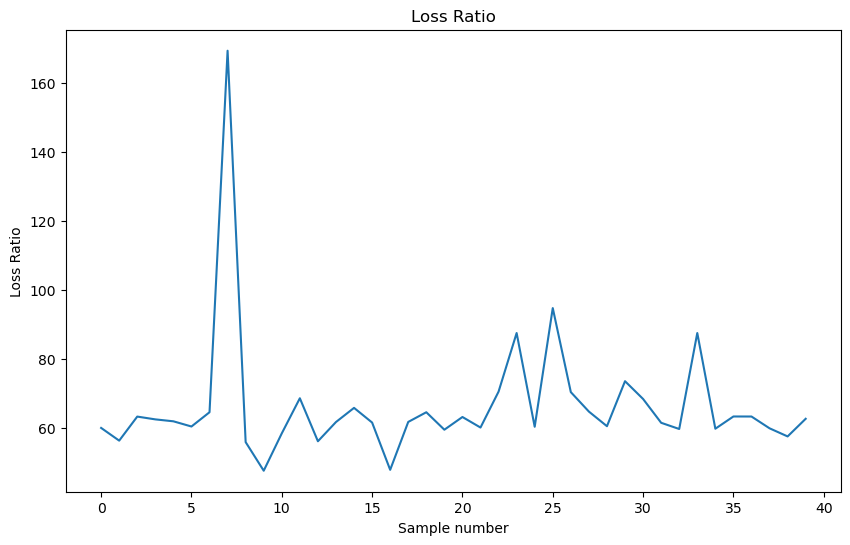

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# 绘制曲线图
plt.figure(figsize=(10, 6))
sns.lineplot(x=X.index, y=y)
plt.title('Loss Ratio')
plt.xlabel('Sample number')
plt.ylabel('Loss Ratio')
plt.show()

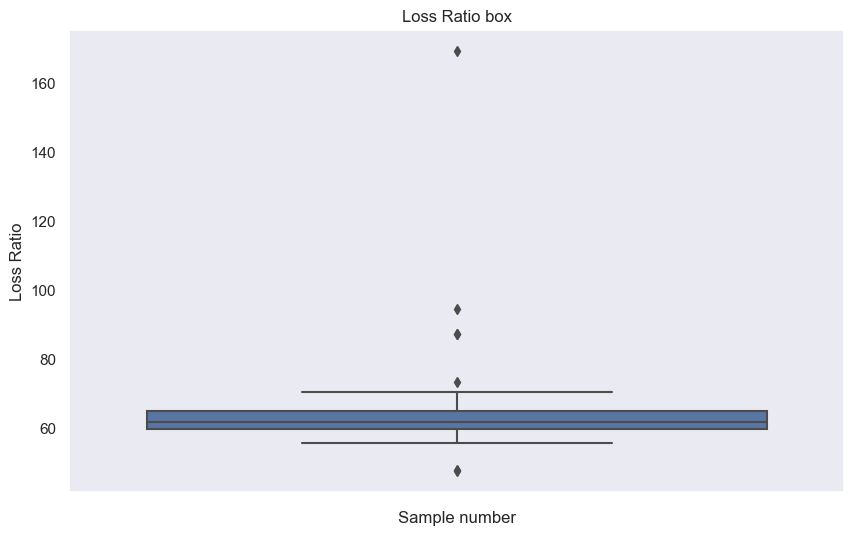

In [33]:
# 绘制箱线图

sns.set_theme(style="dark")

# 设置箱子颜色为紫罗兰色
boxprops = dict(facecolor='violet', edgecolor='black')

plt.figure(figsize=(10, 6))
sns.boxplot(y=y)
plt.title('Loss Ratio box')
plt.xlabel('Sample number')
plt.ylabel('Loss Ratio')
plt.show()

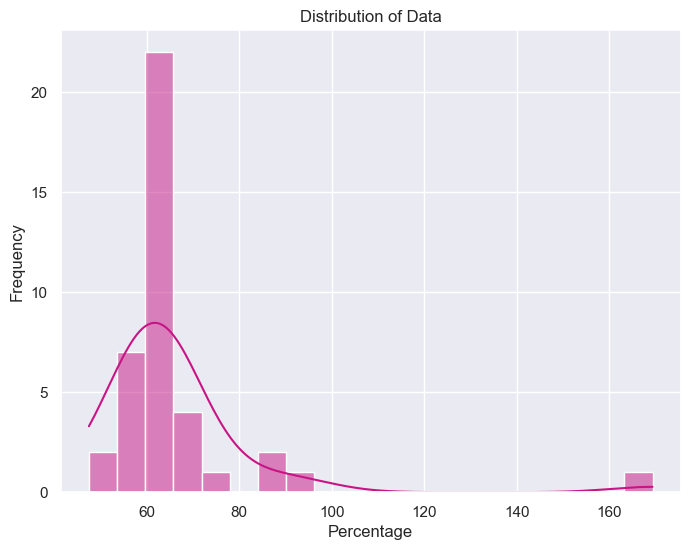

In [23]:

# 设置 seaborn 样式
sns.set_theme(style="darkgrid")

# 绘制直方图和 KDE，根据频数分成三种颜色
plt.figure(figsize=(8, 6))
sns.histplot(y, bins=20, kde=True, color='MediumVioletRed')
plt.title('Distribution of Data')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.show()

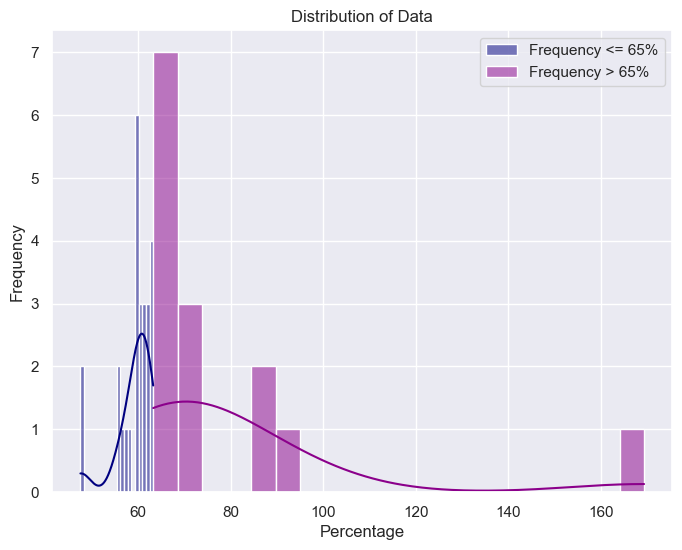

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# 设置 seaborn 样式
sns.set_theme(style="darkgrid")

# 设置阈值
threshold = 63.253499999999995

# 根据频数范围分割数据
subset1 = y[y <= threshold]
subset2 = y[y > threshold]

# 绘制直方图和 KDE，为两个子集设置不同的颜色
plt.figure(figsize=(8, 6))
sns.histplot(subset1, bins=20, kde=True, color='Navy', label='Frequency <= 65%')
sns.histplot(subset2, bins=20, kde=True, color='DarkMagenta', label='Frequency > 65%')
plt.title('Distribution of Data')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [38]:
# 计算 y 中前 65% 的数
threshold_percentage = 80
threshold_value = np.percentile(y, threshold_percentage)

# 找出满足条件的数据
subset = y[y <= threshold_value]

# 输出结果
print(f"前 {threshold_percentage}% 的数据阈值为：{threshold_value}")
print("满足条件的数据：", subset)

前 80% 的数据阈值为：68.382
满足条件的数据： 0     59.94
1     56.25
2     63.23
3     62.42
4     61.86
5     60.35
6     64.49
8     55.82
9     47.52
10    58.36
12    56.07
13    61.65
14    65.76
15    61.50
16    47.78
17    61.68
18    64.49
19    59.42
20    63.11
21    60.05
24    60.27
27    64.68
28    60.44
30    68.34
31    61.43
32    59.63
34    59.71
35    63.26
36    63.25
37    59.83
38    57.47
39    62.59
Name: loss ratio, dtype: float64
